In [ ]:
import numpy as np
import os
import cv2
import shutil
import random as rn
from tqdm import tqdm
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import shutil
import os
import pathlib

# Define the source directory containing your dataset
source_dir = "/content/drive/MyDrive/Flower recognition/archive (6).zip"
# Define the destination directory where you want to extract the dataset
destination_dir = "/content/flowers"

# Copy the files from the source directory to the destination directory
shutil.copytree(source_dir, destination_dir)

# Convert the destination directory path to a pathlib.Path object
data_dir = pathlib.Path(destination_dir)

NotADirectoryError: [Errno 20] Not a directory: '/content/drive/MyDrive/Flower recognition/archive (6).zip'

In [ ]:
print(os.listdir(data_dir))

FileNotFoundError: [Errno 2] No such file or directory: '/content/flowers'

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4317 files belonging to 5 classes.
Using 3454 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)


['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


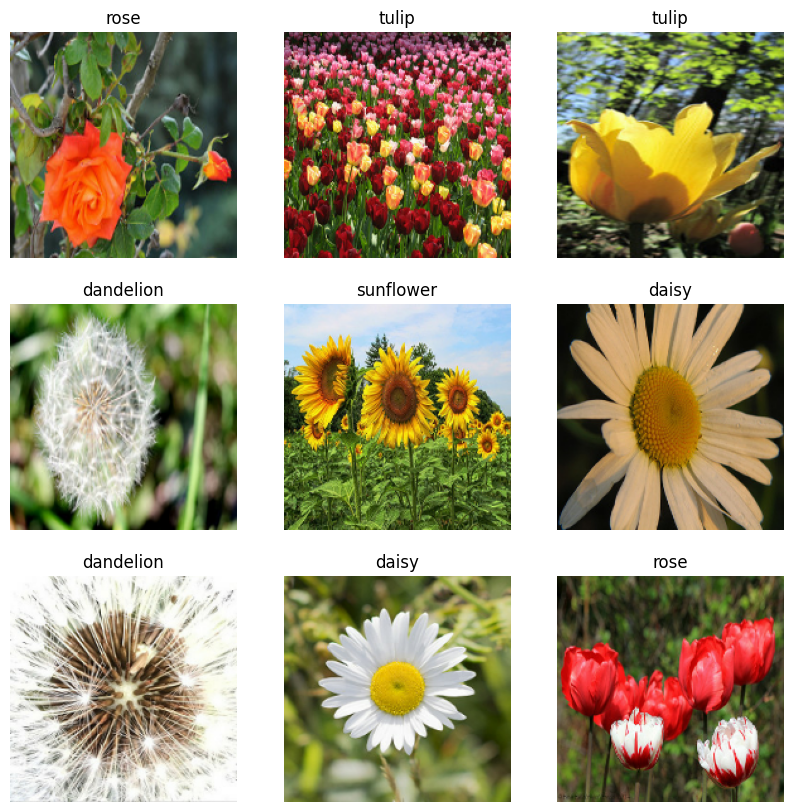

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(32, 180, 180, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE


In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)


In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))


0.0 1.0


In [ ]:
num_classes = 5
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
epochs=10
history = model.fit(train_ds,validation_data=val_ds, epochs=epochs)


Epoch 1/10
108/108 [==============================] - 183s 2s/step - loss: 1.3480 - accuracy: 0.4004 - val_loss: 1.1658 - val_accuracy: 0.5203
Epoch 2/10
108/108 [==============================] - 170s 2s/step - loss: 1.0535 - accuracy: 0.5790 - val_loss: 1.0007 - val_accuracy: 0.5910
Epoch 3/10
108/108 [==============================] - 162s 2s/step - loss: 0.8921 - accuracy: 0.6526 - val_loss: 0.9444 - val_accuracy: 0.6280
Epoch 4/10
108/108 [==============================] - 156s 1s/step - loss: 0.7915 - accuracy: 0.6896 - val_loss: 0.9476 - val_accuracy: 0.6466
Epoch 5/10
108/108 [==============================] - 157s 1s/step - loss: 0.7082 - accuracy: 0.7264 - val_loss: 1.0619 - val_accuracy: 0.6454
Epoch 6/10
108/108 [==============================] - 163s 2s/step - loss: 0.5759 - accuracy: 0.7881 - val_loss: 1.0767 - val_accuracy: 0.6501
Epoch 7/10
108/108 [==============================] - 163s 2s/step - loss: 0.4400 - accuracy: 0.8312 - val_loss: 1.1899 - val_accuracy: 0.6524

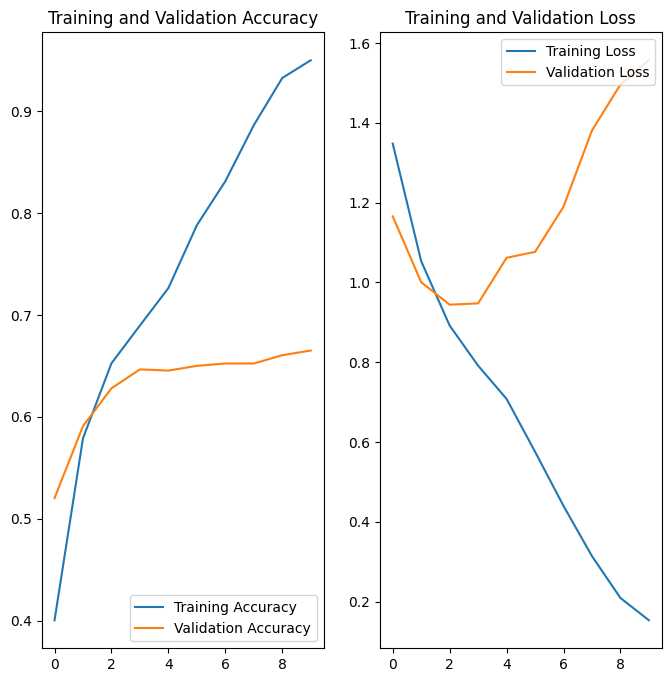

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),layers.experimental.preprocessing.RandomRotation(0.1),layers.experimental.preprocessing.RandomZoom(0.1),])


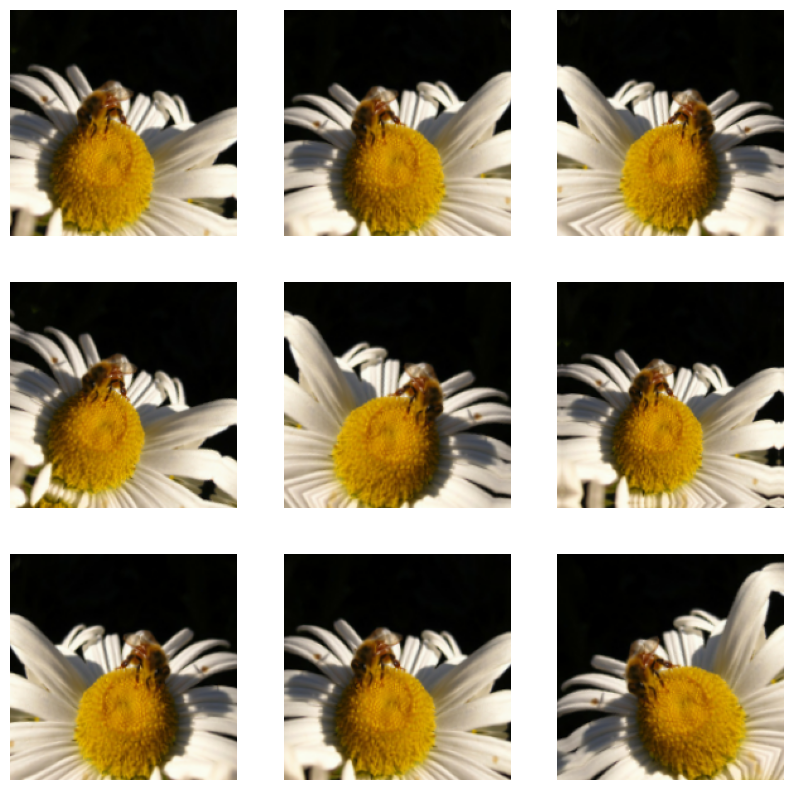

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")


In [ ]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [ ]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
epochs=20
history = model.fit(train_ds,validation_data=val_ds,epochs=epochs)


Epoch 1/20
108/108 [==============================] - 159s 1s/step - loss: 1.3366 - accuracy: 0.4155 - val_loss: 1.1240 - val_accuracy: 0.5388
Epoch 2/20
108/108 [==============================] - 155s 1s/step - loss: 1.0747 - accuracy: 0.5724 - val_loss: 1.0830 - val_accuracy: 0.5794
Epoch 3/20
108/108 [==============================] - 163s 2s/step - loss: 0.9668 - accuracy: 0.6251 - val_loss: 0.9658 - val_accuracy: 0.6037
Epoch 4/20
108/108 [==============================] - 157s 1s/step - loss: 0.9079 - accuracy: 0.6511 - val_loss: 0.9088 - val_accuracy: 0.6570
Epoch 5/20
108/108 [==============================] - 155s 1s/step - loss: 0.8351 - accuracy: 0.6812 - val_loss: 0.8489 - val_accuracy: 0.6709
Epoch 6/20
108/108 [==============================] - 153s 1s/step - loss: 0.7987 - accuracy: 0.6989 - val_loss: 0.8015 - val_accuracy: 0.6732
Epoch 7/20
108/108 [==============================] - 151s 1s/step - loss: 0.7611 - accuracy: 0.7131 - val_loss: 0.7865 - val_accuracy: 0.6964

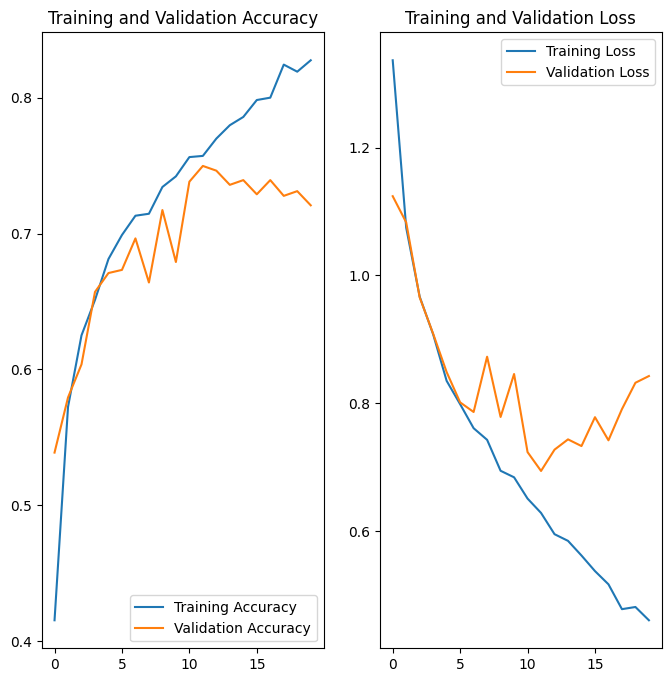

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()


TypeError: 'NoneType' object is not subscriptable

1/1 [==============================] - 0s 385ms/step


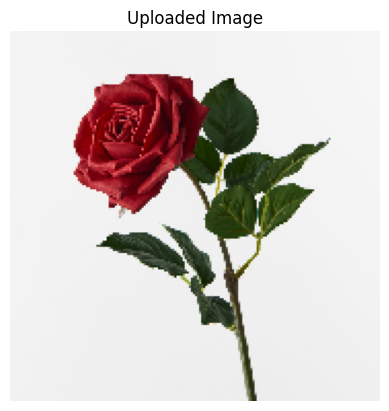

rose


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

for fn in uploaded.keys():
    # predicting images
    path = '/content/' + fn
    img = image.load_img(path, target_size=(180, 180))

    x = image.img_to_array(img)
    test_img = np.expand_dims(x, axis=0)

    result = model.predict(test_img)
    pred = np.argmax(result)  # get the index of max value

    plt.imshow(img)
    plt.axis('off')
    plt.title('Uploaded Image')
    plt.show()

    print(class_names[pred])
